## David Gamaliel Arcos Bravo
## Francisco Alfredo Castrellon Carrillo

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

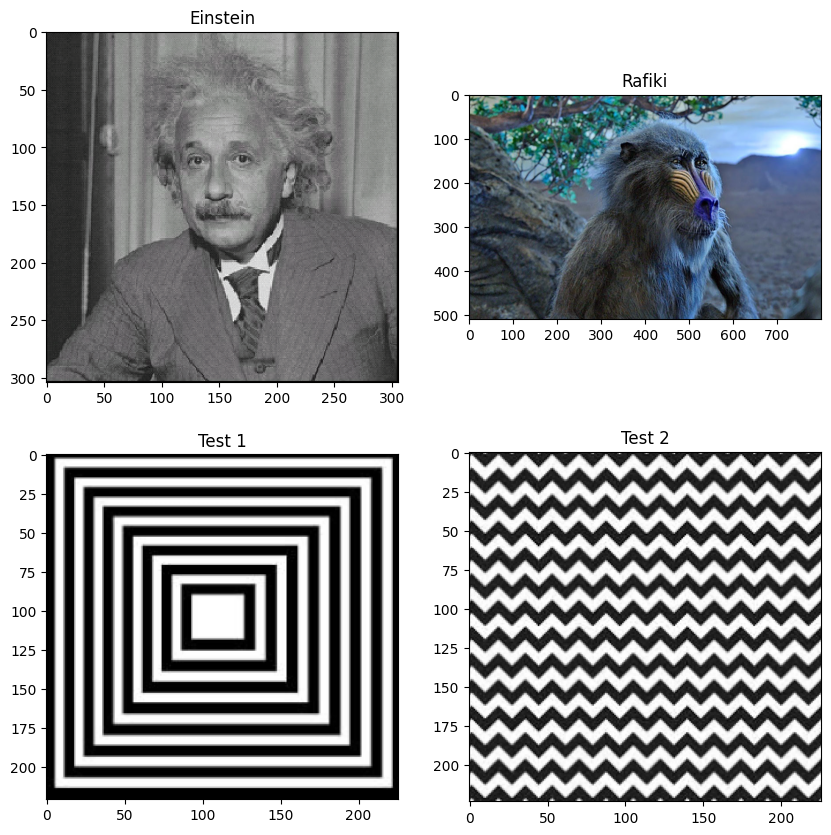

In [47]:
img_einstein = cv2.imread('images/einstein.png')
img_rafiki = cv2.imread('images/rafiki.jpg')
img_test_1 = cv2.imread('images/test_im_1.png')
img_test_2 = cv2.imread('images/test_im_2.png')

# Plot the images
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(img_einstein)
axs[0, 0].set_title('Einstein')
axs[0, 1].imshow(img_rafiki)
axs[0, 1].set_title('Rafiki')
axs[1, 0].imshow(img_test_1)
axs[1, 0].set_title('Test 1')
axs[1, 1].imshow(img_test_2)
axs[1, 1].set_title('Test 2')
plt.show()

In [54]:
def normalize(img):
    return (img - np.min(img)) / (np.max(img) - np.min(img))

def apply_gradient(img):
    kernel_x = np.array([[1,0,-1]])
    img_x = cv2.filter2D(img.copy(), cv2.CV_64F, kernel_x)
    kernel_y = np.array([[1],[0],[-1]])
    img_y = cv2.filter2D(img.copy(), cv2.CV_64F, kernel_y)
    kernel_45 = np.array([[1,0,0],[0,0,0],[0,0,-1]])
    img_45 = cv2.filter2D(img.copy(), cv2.CV_64F, kernel_45)
    img_x_y = img_x + img_y
    img_x = normalize(img_x)
    img_y = normalize(img_y)
    img_x_y = normalize(img_x_y)
    img_45 = normalize(img_45)
    return img_x, img_y, img_45, img_x_y

def plot_gradient(img):
    img_x, img_y, img_45, img_x_y = apply_gradient(img)

    fig, ax = plt.subplots(1, 4, figsize=(15, 15))
    ax[0].imshow(img_x, cmap='gray')
    ax[0].set_title('Gradient X')
    ax[1].imshow(img_y, cmap='gray')
    ax[1].set_title('Gradient Y')
    ax[2].imshow(img_45, cmap='gray')
    ax[2].set_title('Gradient 45')
    ax[3].imshow(img_x_y, cmap='gray')
    ax[3].set_title('Gradient X + Y')
    plt.show()

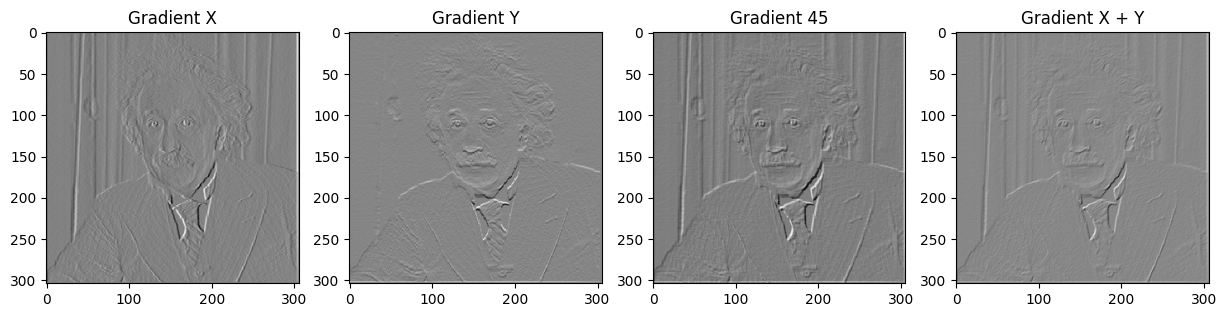

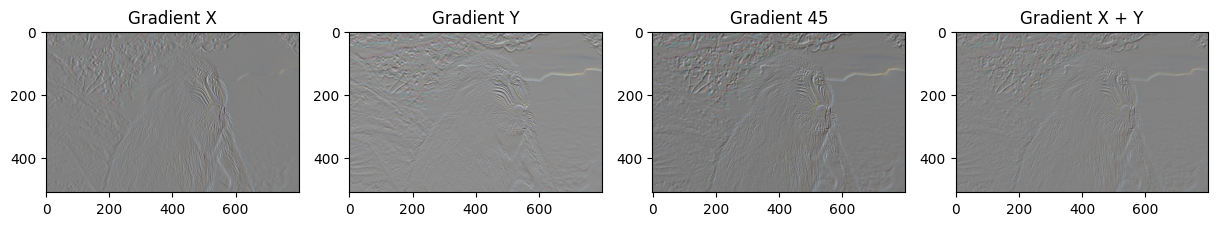

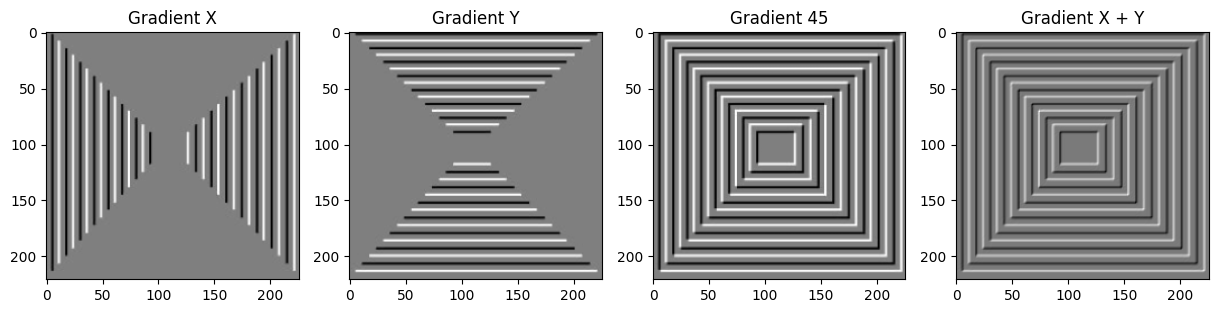

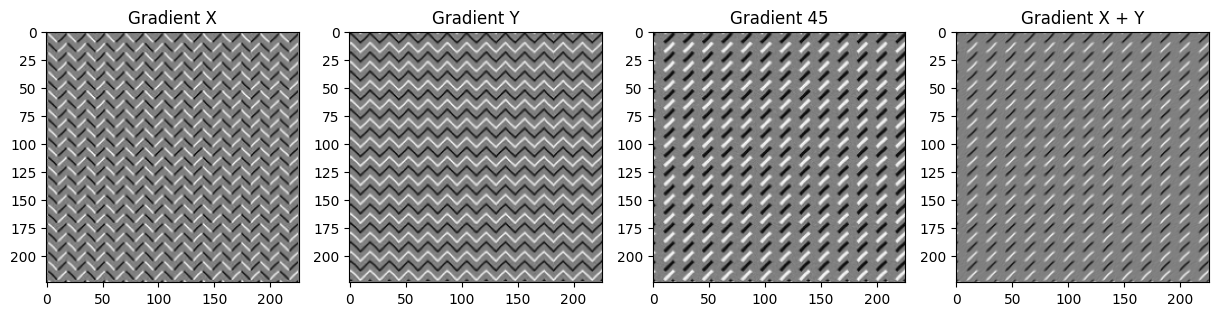

In [55]:
plot_gradient(img_einstein)
plot_gradient(img_rafiki)
plot_gradient(img_test_1)
plot_gradient(img_test_2)